In [40]:
import qctoolkit as qtk
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
from glob import glob
import os
import itertools

#Note inline and notebook is contradicting to each other
%matplotlib inline

In [41]:
def get_outs(i, root='gaussian_N2_1D'):
    qtk.setting.quiet = True
    outs = []
    sys_names = ['HAl', 'HeMg', 'LiNa', 'BeNe', 'BF', 'CO', 'N2']
    for sys in sys_names:
        path = glob('%s/diff_%s_%d/*.log' % (root, sys, i))[0]
        outs.append(qtk.QMOut(path, program='gaussian'))
    qtk.setting.quiet = False
    return outs

def get_htouts(i, root='gaussian_N2_1D'):
    qtk.setting.quiet = True
    outs = []
    sys_names = ['HAl', 'HeMg', 'LiNa', 'BeNe', 'BF', 'CO', 'N2']
    for sys in sys_names:
        path = glob('%s/diff_%s_%d/*.log' % (root, sys, i))[0]
        out = qtk.QMOut(path, program='gaussian')
        outs.append(out.as_horton())
    qtk.setting.quiet = False
    return outs

outs_grp = [get_outs(i) for i in range(3)]
htouts_grp = [get_htouts(i) for i in range(3)]

In [42]:
[o.name for o in outs_grp[0]]

['diff_HAl_0.log',
 'diff_HeMg_0.log',
 'diff_LiNa_0.log',
 'diff_BeNe_0.log',
 'diff_BF_0.log',
 'diff_CO_0.log',
 'diff_N2_0.log']

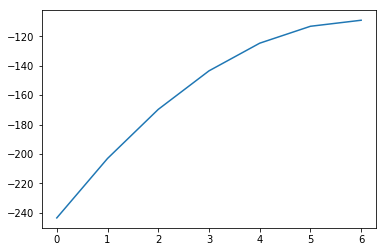

In [44]:
plt.plot([o.Et for o in outs_grp[0]])

In [51]:
def get_d1E(i):
    d1E = []
    for hto in htouts_grp[i]:
        dV_ao = hto.dV_ao_ZRCoords([[1, 0, 0, 0], [-1, 1.1, 0, 0]])
        d1E.append(hto.d1E(dV_ao))
    return d1E
    
d1E_grp = [get_d1E(i) for i in range(3)]

In [52]:
d1E_grp

[[37.880588644351285,
  32.04012956695671,
  25.840447824057623,
  19.688711790992997,
  13.138276490967955,
  6.805857249918195,
  0.3251715513385976],
 [37.3969156845661,
  31.751260390096423,
  25.528938058909194,
  19.383054682283746,
  12.827662243860493,
  6.4839144563299795,
  2.494406473261537e-07],
 [37.12453624097394,
  31.441799458647314,
  25.21793152409299,
  19.077283378164097,
  12.516359186852183,
  6.161635024333106,
  -0.3251710400709766]]